In [56]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("train.csv",sep=",")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df=df.drop(['Name','PassengerId','Cabin','Ticket'],axis=1)

In [6]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [7]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [9]:
from sklearn.impute import SimpleImputer

In [10]:
mean_imputer=SimpleImputer(strategy='mean')

In [11]:
df['Age']=mean_imputer.fit_transform(df[['Age']])

In [12]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [13]:
mf_imputer=SimpleImputer(strategy='most_frequent')

In [14]:
df['Embarked']=mf_imputer.fit_transform(df[['Embarked']])

In [15]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [16]:
bins=np.arange(0,82,10)

In [17]:
df['AgeBucket']=pd.cut(df.Age,bins=bins)

In [18]:
df=pd.get_dummies(df,columns=['Sex','Pclass','Embarked','AgeBucket'])

In [19]:
df

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,...,Embarked_Q,Embarked_S,"AgeBucket_(0, 10]","AgeBucket_(10, 20]","AgeBucket_(20, 30]","AgeBucket_(30, 40]","AgeBucket_(40, 50]","AgeBucket_(50, 60]","AgeBucket_(60, 70]","AgeBucket_(70, 80]"
0,0,22.000000,1,0,7.2500,0,1,0,0,1,...,0,1,0,0,1,0,0,0,0,0
1,1,38.000000,1,0,71.2833,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,26.000000,0,0,7.9250,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
3,1,35.000000,1,0,53.1000,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4,0,35.000000,0,0,8.0500,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,13.0000,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,0
887,1,19.000000,0,0,30.0000,1,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
888,0,29.699118,1,2,23.4500,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
889,1,26.000000,0,0,30.0000,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
y=df.Survived

In [22]:
x=df.drop('Survived',axis=1)

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [24]:
x_train

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,"AgeBucket_(0, 10]","AgeBucket_(10, 20]","AgeBucket_(20, 30]","AgeBucket_(30, 40]","AgeBucket_(40, 50]","AgeBucket_(50, 60]","AgeBucket_(60, 70]","AgeBucket_(70, 80]"
132,47.000000,1,0,14.5000,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
813,6.000000,4,2,31.2750,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0
353,25.000000,1,0,17.8000,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
413,29.699118,0,0,0.0000,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0
862,48.000000,0,0,25.9292,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,16.000000,0,0,7.7750,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0
335,29.699118,0,0,7.8958,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
155,51.000000,0,1,61.3792,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0
524,29.699118,0,0,7.2292,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0


In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=32)

In [26]:
x_train

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,"AgeBucket_(0, 10]","AgeBucket_(10, 20]","AgeBucket_(20, 30]","AgeBucket_(30, 40]","AgeBucket_(40, 50]","AgeBucket_(50, 60]","AgeBucket_(60, 70]","AgeBucket_(70, 80]"
293,24.000000,0,0,8.8500,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
617,26.000000,1,0,16.1000,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
424,18.000000,1,1,20.2125,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0
888,29.699118,1,2,23.4500,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
230,35.000000,1,0,83.4750,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,28.000000,1,0,15.8500,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
88,23.000000,3,2,263.0000,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
310,24.000000,0,0,83.1583,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
555,62.000000,0,0,26.5500,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0


In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler=StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [29]:
scaler.mean_

array([2.97827503e+01, 5.39325843e-01, 3.91853933e-01, 3.14411920e+01,
       3.53932584e-01, 6.46067416e-01, 2.42977528e-01, 2.07865169e-01,
       5.49157303e-01, 1.85393258e-01, 8.28651685e-02, 7.31741573e-01,
       7.58426966e-02, 1.32022472e-01, 4.39606742e-01, 1.76966292e-01,
       1.02528090e-01, 4.63483146e-02, 2.24719101e-02, 4.21348315e-03])

In [30]:
scaler.var_

array([1.73335708e+02, 1.27935235e+00, 6.03472967e-01, 2.22318134e+03,
       2.28664310e-01, 2.28664310e-01, 1.83939449e-01, 1.64657240e-01,
       2.47583560e-01, 1.51022598e-01, 7.59985324e-02, 1.96295843e-01,
       7.00905820e-02, 1.14592539e-01, 2.46352654e-01, 1.45649224e-01,
       9.20160807e-02, 4.42001483e-02, 2.19669234e-02, 4.19572971e-03])

In [31]:
x_train=scaler.transform(x_train)

In [32]:
x_train

array([[-4.39228409e-01, -4.76821846e-01, -5.04423486e-01, ...,
        -2.20456081e-01, -1.51619609e-01, -6.50485335e-02],
       [-2.87318545e-01,  4.07285326e-01, -5.04423486e-01, ...,
        -2.20456081e-01, -1.51619609e-01, -6.50485335e-02],
       [-8.94958003e-01,  4.07285326e-01,  7.82850787e-01, ...,
        -2.20456081e-01, -1.51619609e-01, -6.50485335e-02],
       ...,
       [-4.39228409e-01, -4.76821846e-01, -5.04423486e-01, ...,
        -2.20456081e-01, -1.51619609e-01, -6.50485335e-02],
       [ 2.44705901e+00, -4.76821846e-01, -5.04423486e-01, ...,
        -2.20456081e-01,  6.59545298e+00, -6.50485335e-02],
       [-6.35231480e-03, -4.76821846e-01, -5.04423486e-01, ...,
        -2.20456081e-01, -1.51619609e-01, -6.50485335e-02]])

In [33]:
x_train[:,0].mean()

2.2952925452924586e-16

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
model=LogisticRegression()

In [36]:
model.fit(x_train,y_train)

LogisticRegression()

In [37]:
list(zip(x_test.columns,model.coef_.flatten()))

[('Age', -0.6003433082558699),
 ('SibSp', -0.577496997599264),
 ('Parch', -0.1767371373882676),
 ('Fare', 0.26382854945984624),
 ('Sex_female', 0.657878287367842),
 ('Sex_male', -0.6578782873678433),
 ('Pclass_1', 0.4012204672763792),
 ('Pclass_2', 0.10951442266714195),
 ('Pclass_3', -0.43513772732287054),
 ('Embarked_C', 0.12553981841788064),
 ('Embarked_Q', 0.04128994662218109),
 ('Embarked_S', -0.13580672212628772),
 ('AgeBucket_(0, 10]', 0.2320270552768179),
 ('AgeBucket_(10, 20]', -0.2342820924765534),
 ('AgeBucket_(20, 30]', -0.13972305936642818),
 ('AgeBucket_(30, 40]', 0.11714124239252166),
 ('AgeBucket_(40, 50]', 0.06298110744859181),
 ('AgeBucket_(50, 60]', 0.05545887679702485),
 ('AgeBucket_(60, 70]', 0.03171807273088894),
 ('AgeBucket_(70, 80]', 0.1089721287270259)]

([<matplotlib.axis.XTick at 0x1e7add7b520>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

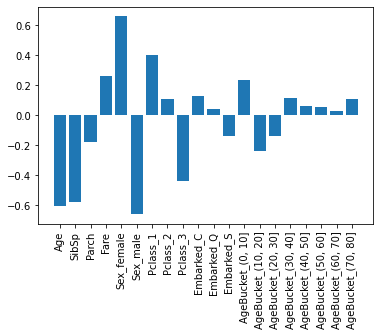

In [38]:
from matplotlib import pyplot as plt
plt.bar(x_test.columns,model.coef_.flatten())
plt.xticks(x_test.columns,rotation=90)


In [39]:
model.intercept_

array([-0.67202707])

In [40]:
y_hat=model.predict(scaler.transform(x_test))
y_hat

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0], dtype=int64)

In [41]:
list(zip(y_hat,y_test))

[(0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 1),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 1),
 (0, 0),
 (1, 1),
 (1, 0),
 (1, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 1),
 (0, 1),
 (0, 0),
 (0, 1),
 

In [42]:
model.score(scaler.transform(x_test),y_test)

0.776536312849162

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_hat)

array([[91, 17],
       [23, 48]], dtype=int64)

In [44]:
from sklearn.metrics import precision_score,recall_score

In [45]:
recall_score(y_test,y_hat)

0.676056338028169

In [46]:
48/(48+23)

0.676056338028169

In [47]:
y_prob=model.predict_proba(scaler.transform(x_test))
y_prob

array([[0.92224373, 0.07775627],
       [0.09274689, 0.90725311],
       [0.06532269, 0.93467731],
       [0.88274427, 0.11725573],
       [0.79800553, 0.20199447],
       [0.09479496, 0.90520504],
       [0.90044284, 0.09955716],
       [0.9047394 , 0.0952606 ],
       [0.88454183, 0.11545817],
       [0.79236768, 0.20763232],
       [0.90556803, 0.09443197],
       [0.05558814, 0.94441186],
       [0.68395439, 0.31604561],
       [0.59838347, 0.40161653],
       [0.06022759, 0.93977241],
       [0.88273703, 0.11726297],
       [0.90488335, 0.09511665],
       [0.91658326, 0.08341674],
       [0.26283003, 0.73716997],
       [0.55019884, 0.44980116],
       [0.59173231, 0.40826769],
       [0.153127  , 0.846873  ],
       [0.53013114, 0.46986886],
       [0.89234143, 0.10765857],
       [0.97869032, 0.02130968],
       [0.7559678 , 0.2440322 ],
       [0.75266095, 0.24733905],
       [0.91961591, 0.08038409],
       [0.22363063, 0.77636937],
       [0.45652332, 0.54347668],
       [0.

In [48]:
y_prob.shape

(179, 2)

In [49]:
y_prob1=y_prob[0:,1]

In [50]:
y_prob1

array([0.07775627, 0.90725311, 0.93467731, 0.11725573, 0.20199447,
       0.90520504, 0.09955716, 0.0952606 , 0.11545817, 0.20763232,
       0.09443197, 0.94441186, 0.31604561, 0.40161653, 0.93977241,
       0.11726297, 0.09511665, 0.08341674, 0.73716997, 0.44980116,
       0.40826769, 0.846873  , 0.46986886, 0.10765857, 0.02130968,
       0.2440322 , 0.24733905, 0.08038409, 0.77636937, 0.54347668,
       0.13705657, 0.89365395, 0.95830369, 0.67542853, 0.77435934,
       0.11674749, 0.96106111, 0.08348273, 0.11680041, 0.73102932,
       0.53566183, 0.63011144, 0.65196927, 0.07671695, 0.09074649,
       0.11726297, 0.08000122, 0.56913258, 0.22904778, 0.22484618,
       0.93942455, 0.57789328, 0.61474094, 0.061219  , 0.67544901,
       0.0607587 , 0.14292654, 0.08698505, 0.1360779 , 0.54878861,
       0.11139613, 0.23386052, 0.20187646, 0.07769442, 0.10696176,
       0.06948783, 0.13607514, 0.2021499 , 0.56604444, 0.0985575 ,
       0.06423104, 0.14090361, 0.64177738, 0.47363839, 0.08067

In [51]:
list(zip(y_prob1,y_hat))

[(0.07775626852670006, 0),
 (0.9072531065762945, 1),
 (0.9346773080550085, 1),
 (0.11725573186659771, 0),
 (0.20199447086930994, 0),
 (0.9052050418798084, 1),
 (0.09955715988456201, 0),
 (0.0952606022326913, 0),
 (0.11545817320348359, 0),
 (0.20763232350154215, 0),
 (0.09443196660466284, 0),
 (0.9444118611750421, 1),
 (0.31604561285227756, 0),
 (0.4016165314995525, 0),
 (0.9397724052139144, 1),
 (0.1172629716399879, 0),
 (0.09511665331534193, 0),
 (0.08341673699419451, 0),
 (0.7371699736664775, 1),
 (0.4498011626339816, 0),
 (0.4082676935582019, 0),
 (0.8468730042213932, 1),
 (0.4698688614986833, 0),
 (0.10765857397048002, 0),
 (0.021309680189060067, 0),
 (0.24403220049819316, 0),
 (0.24733905189117072, 0),
 (0.0803840938219919, 0),
 (0.7763693734809692, 1),
 (0.5434766775886827, 1),
 (0.13705657033321497, 0),
 (0.8936539532419449, 1),
 (0.9583036887929944, 1),
 (0.6754285276093019, 1),
 (0.7743593443897753, 1),
 (0.1167474868043884, 0),
 (0.9610611053462059, 1),
 (0.0834827303087022, 

In [52]:
from sklearn.metrics import roc_curve, precision_recall_curve

In [53]:
tpr,fpr,t=roc_curve(y_test,y_prob1)

In [54]:
tpr,fpr,t

(array([0.        , 0.        , 0.        , 0.00925926, 0.00925926,
        0.01851852, 0.01851852, 0.02777778, 0.02777778, 0.0462963 ,
        0.0462963 , 0.05555556, 0.05555556, 0.06481481, 0.06481481,
        0.07407407, 0.07407407, 0.08333333, 0.08333333, 0.09259259,
        0.09259259, 0.11111111, 0.11111111, 0.14814815, 0.14814815,
        0.15740741, 0.15740741, 0.16666667, 0.16666667, 0.18518519,
        0.18518519, 0.19444444, 0.19444444, 0.21296296, 0.21296296,
        0.22222222, 0.22222222, 0.23148148, 0.23148148, 0.26851852,
        0.28703704, 0.31481481, 0.31481481, 0.41666667, 0.41666667,
        0.46296296, 0.47222222, 0.49074074, 0.5       , 0.5       ,
        0.53703704, 0.57407407, 0.57407407, 0.58333333, 0.58333333,
        0.7037037 , 0.7037037 , 0.75      , 0.75      , 0.75925926,
        0.75925926, 0.76851852, 0.76851852, 0.82407407, 0.84259259,
        1.        ]),
 array([0.        , 0.01408451, 0.22535211, 0.22535211, 0.32394366,
        0.32394366, 0.3661

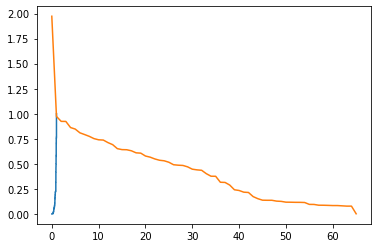

In [55]:
plt.plot(fpr,tpr,t)